In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
pd.options.display.float_format = '{:.4f}'.format

In [2]:
# Appenda string na imena 
def append_name(df,name):
    cols = []
    for col in df.columns:
        if str(col)!="Timestamp":
            cols.append(str(col)+"_"+name)
        else:
            cols.append("Timestamp")
    df.columns = cols
    return df

In [4]:
combined = pd.DataFrame(pd.date_range(start ="2014-01-01 01:00:00", end ="2019-08-12 12:47:00", freq='T'))
combined.columns = ["Timestamp"]
exchanges = os.listdir("/home/filip/Desktop/Ruđer/MinuteData/")
exchanges.remove("trade_1-min_data.csv")

(624413, 2)


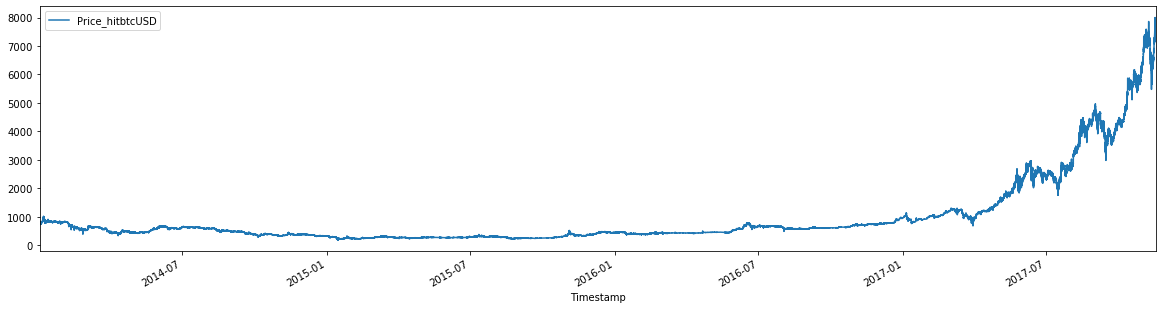

(1628062, 2)


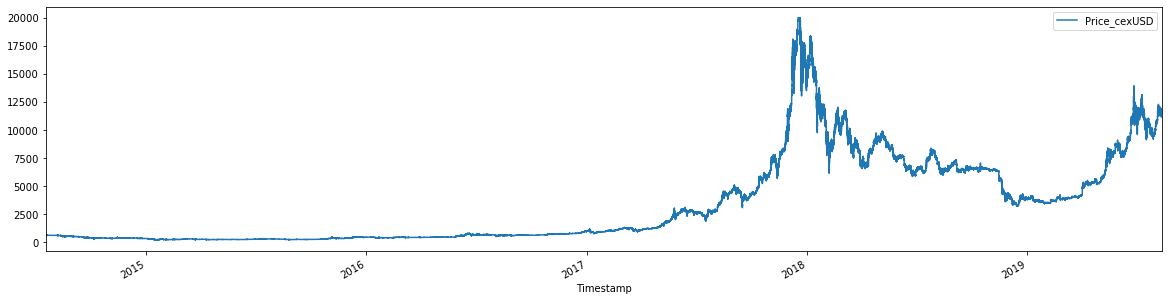

(325780, 2)


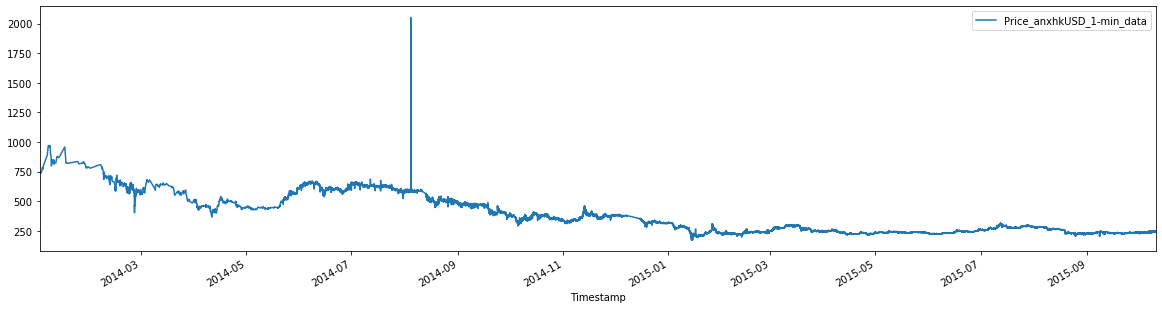

(32747, 2)


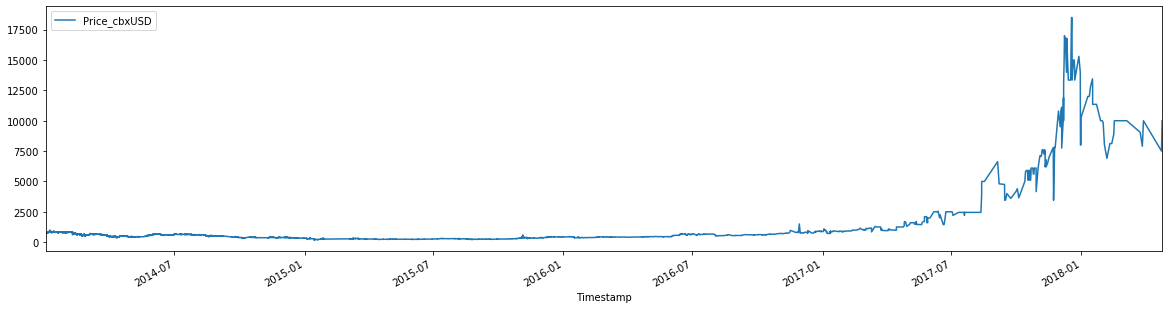

(2419978, 2)


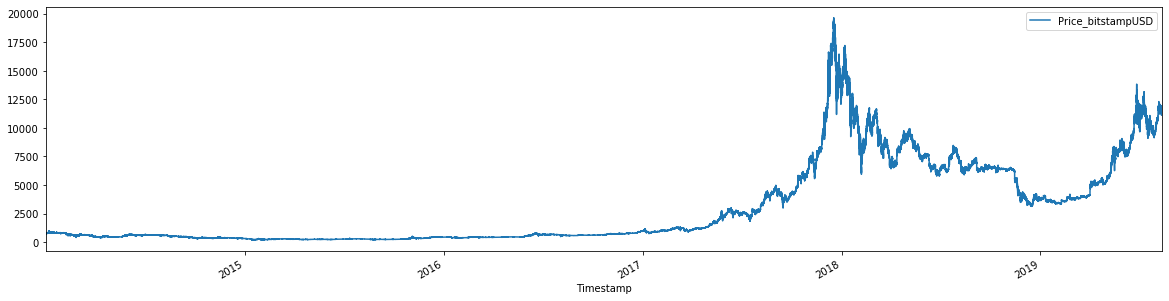

(870854, 2)


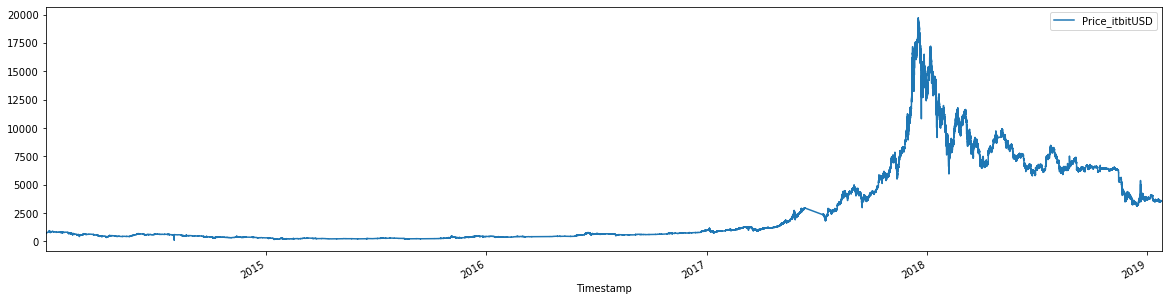

(419614, 2)


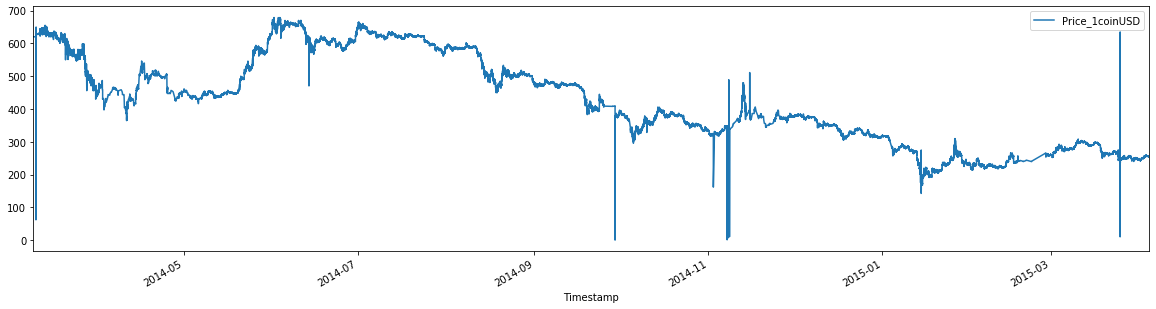

(1327286, 2)


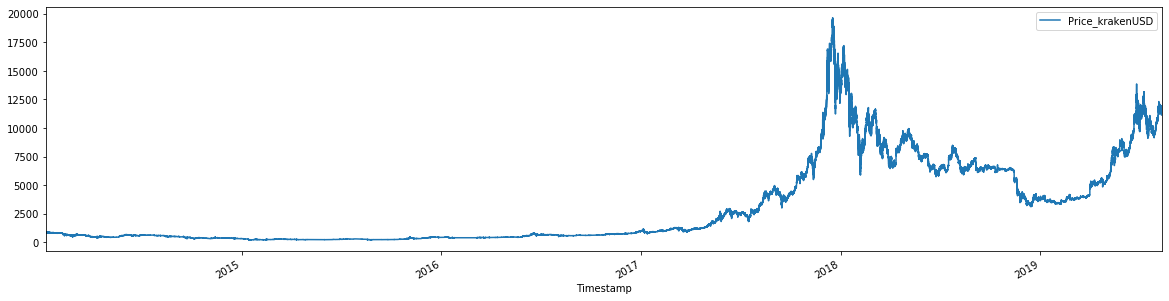

(1990691, 2)


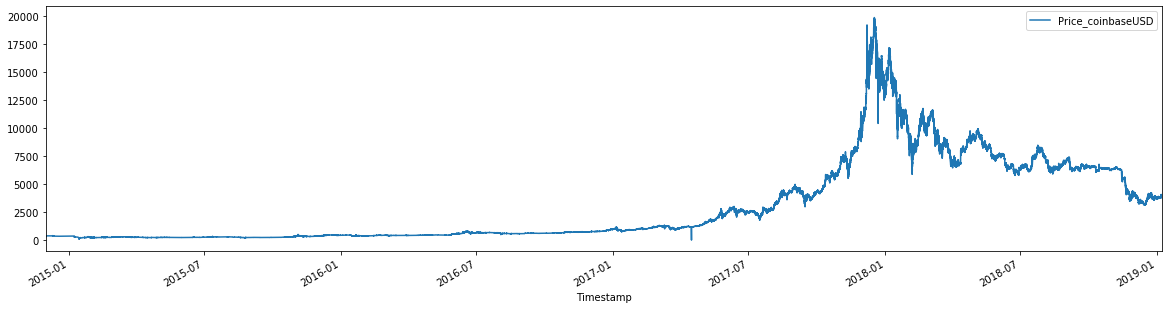

(998162, 2)


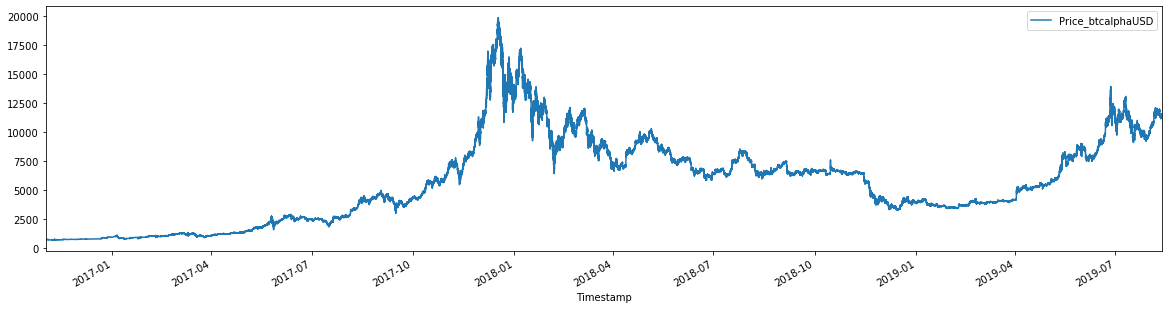

(553058, 2)


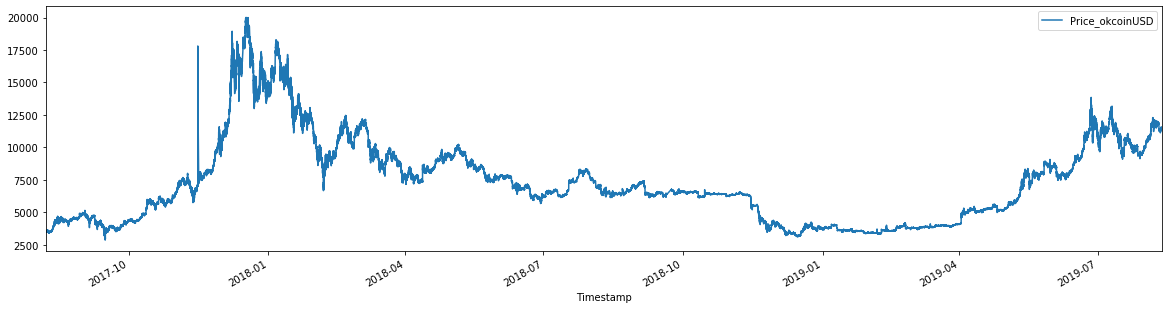

(783391, 2)


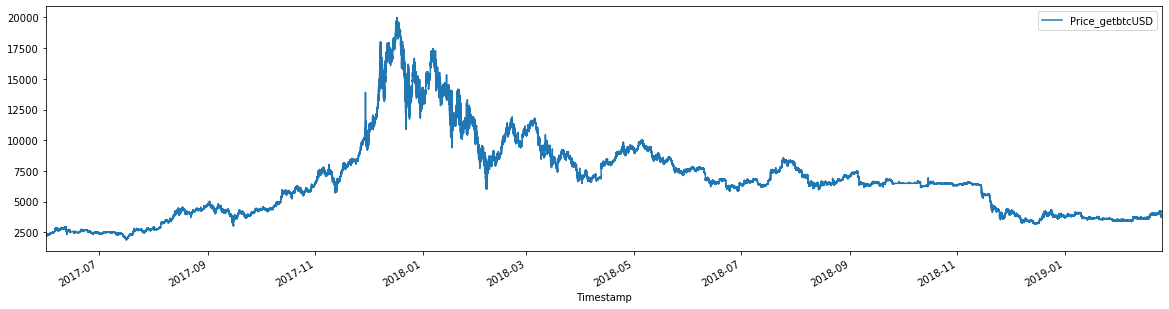

(135244, 2)


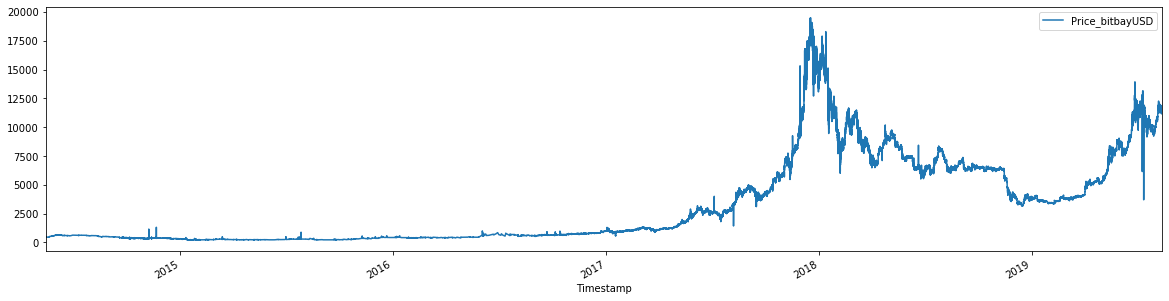

(325780, 2)


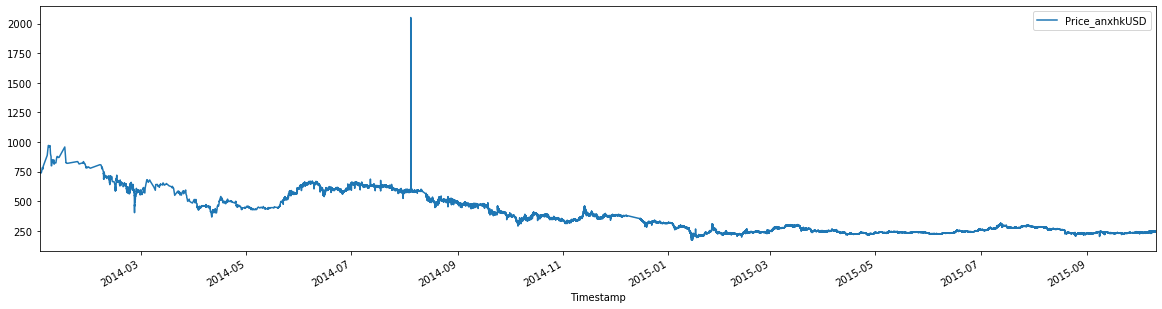

(1058919, 2)


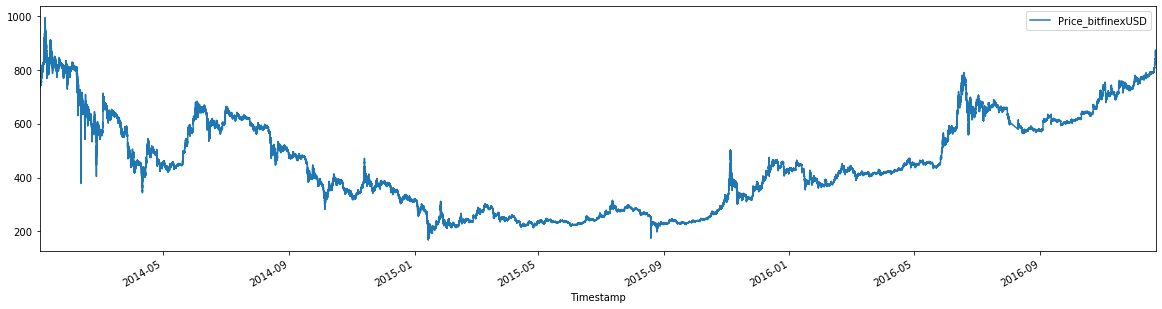

(672698, 2)


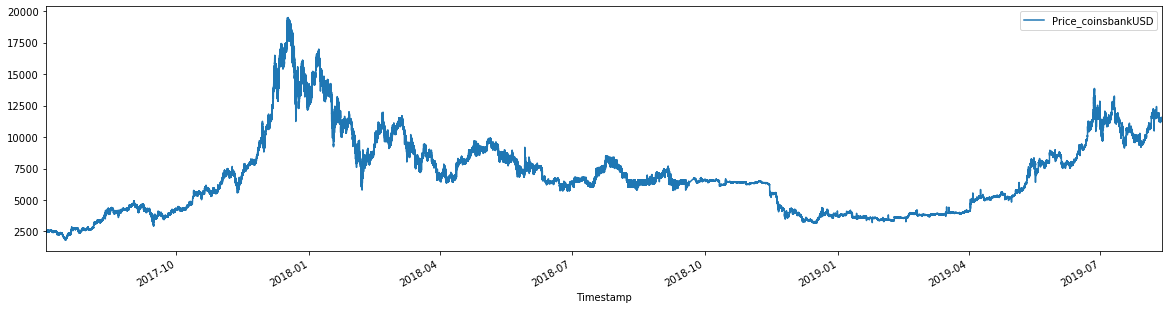

(91511, 2)


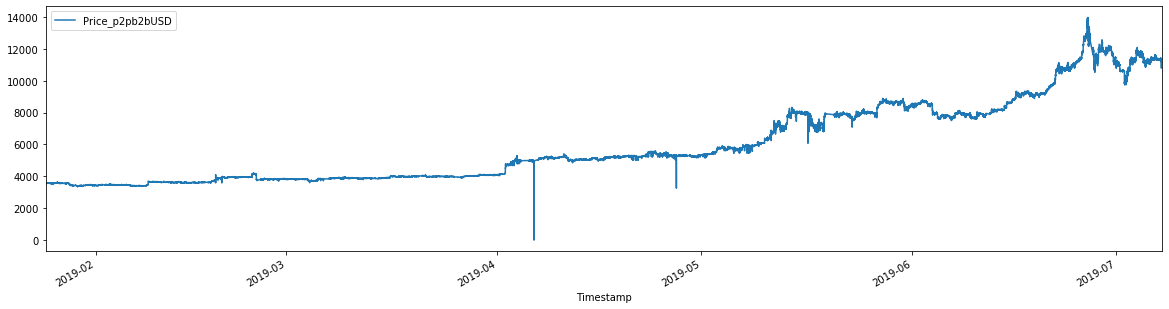

(175294, 2)


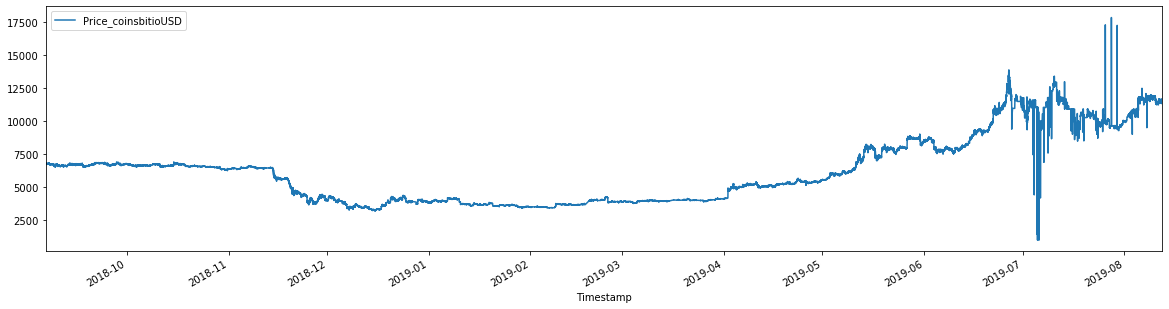

(476336, 2)


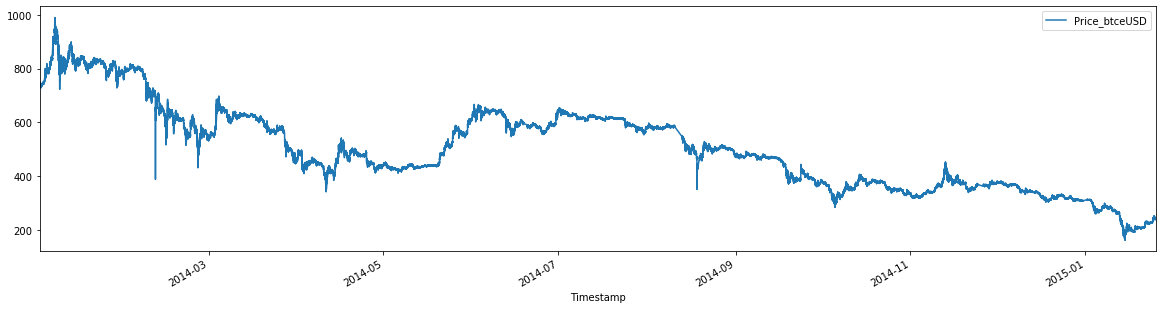

In [5]:
# Plotanje cijena sa svakog exchangea. I spajanje tih podataka u jedan dataset.
for name in exchanges:
    exchange = name.split(".csv")[0]
    df = pd.read_csv('/home/filip/Desktop/Ruđer/MinuteData/'+name)
    df = df[1:]
    df["Timestamp"] = pd.to_datetime(df["Timestamp"])
    df = df.loc[df["Price"]<20000]
    df = df[["Price","Timestamp"]]
    df = append_name(df,exchange)
    print(df.shape)
    combined = pd.merge(combined, df, left_on='Timestamp', right_on='Timestamp', how='left')
    df.plot(x="Timestamp",y="Price"+"_"+exchange,figsize=(20,5))
    plt.show()
    df.tail()

In [6]:
# Kreiranje finalnog dataseta. Agregiranje na više načina.
combined = combined.set_index("Timestamp")
helper = combined.copy()
combined["Median"] = helper.median(axis=1)
combined["Std"] = helper.std(axis=1)
combined["Price"] = helper.mean(axis=1)
combined["High"] = helper.max(axis=1)
combined["Low"] = helper.min(axis=1)
combined = combined.reset_index()
combined = combined[["Median","Std","Price","High","Low","Timestamp"]]
combined = append_name(combined,"exchanges")
combined.head()

,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp
0,nan,nan,nan,nan,nan,2014-01-01 01:00:00
1,736.9758,8.1682,736.9758,742.7515,731.2000,2014-01-01 01:01:00
2,739.0000,5.9938,738.9908,744.9800,732.9925,2014-01-01 01:02:00
3,739.4150,9.0816,739.4150,745.8366,732.9933,2014-01-01 01:03:00
4,738.4067,5.8770,738.7053,744.7259,732.9833,2014-01-01 01:04:00


In [7]:
# Loadanje dataseta koji je agregacija svih ticker podataka
trade = pd.read_csv('/home/filip/Desktop/Ruđer/MinuteData/trade_1-min_data.csv')
trade["Timestamp"] = pd.to_datetime(trade["Timestamp"])
trade = trade.loc[(trade.Std<trade.Price*0.05)]
trade = trade.loc[trade["Price"]<20000]
trade = append_name(trade,"trades")
trade.head()

,High_trades,Low_trades,Trades_trades,Std_trades,Price_trades,Var_trades,Timestamp
1,743.6700,731.2000,22.0000,4.5729,740.6513,20.9117,2014-01-01 01:01:00
2,744.9800,732.9800,10.0000,4.0471,734.7920,16.3788,2014-01-01 01:02:00
3,746.6000,732.9800,10.0000,6.2528,741.9836,39.0978,2014-01-01 01:03:00
4,746.6000,732.9800,31.0000,4.8109,741.8416,23.1451,2014-01-01 01:04:00
5,745.0000,738.5000,4.0000,3.2500,743.3750,10.5625,2014-01-01 01:05:00


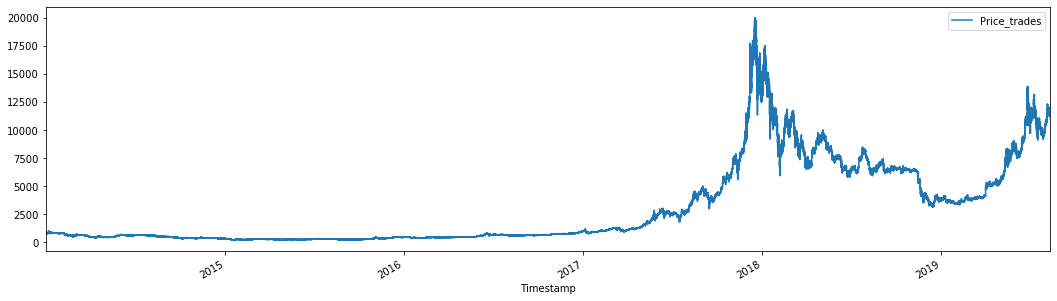

In [8]:
trade.plot(x="Timestamp",y="Price_trades",figsize=(18,5))

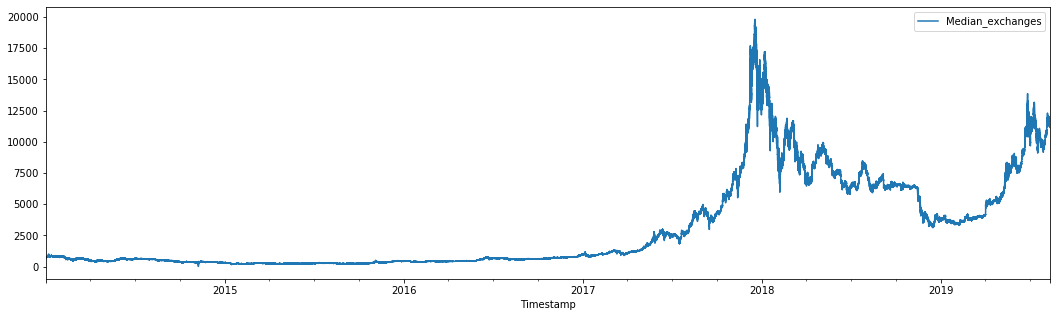

In [9]:
combined.plot(x="Timestamp",y=["Median_exchanges"],figsize=(18,5))

In [10]:

df = pd.merge(combined, trade, left_on='Timestamp', right_on='Timestamp', how='left')
df["Std_exchanges"] = df["Std_exchanges"].fillna(0)
df["Std_trades"] = df["Std_trades"].fillna(0)
print("Before:")
print(df.isnull().sum())
df = df.apply(pd.Series.interpolate)
print("\nAfter:")
print(df.isnull().sum())
print(df.shape)
df = df.dropna()
df.head()

Before:
Median_exchanges     4850
Std_exchanges           0
Price_exchanges      4850
High_exchanges       4850
Low_exchanges        4850
Timestamp               0
High_trades         26763
Low_trades          26763
Trades_trades       26763
Std_trades              0
Price_trades        26763
Var_trades          26763
dtype: int64

After:
Median_exchanges    1
Std_exchanges       0
Price_exchanges     1
High_exchanges      1
Low_exchanges       1
Timestamp           0
High_trades         1
Low_trades          1
Trades_trades       1
Std_trades          0
Price_trades        1
Var_trades          1
dtype: int64
(2951268, 12)


,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp,High_trades,Low_trades,Trades_trades,Std_trades,Price_trades,Var_trades
1,736.9758,8.1682,736.9758,742.7515,731.2000,2014-01-01 01:01:00,743.6700,731.2000,22.0000,4.5729,740.6513,20.9117
2,739.0000,5.9938,738.9908,744.9800,732.9925,2014-01-01 01:02:00,744.9800,732.9800,10.0000,4.0471,734.7920,16.3788
3,739.4150,9.0816,739.4150,745.8366,732.9933,2014-01-01 01:03:00,746.6000,732.9800,10.0000,6.2528,741.9836,39.0978
4,738.4067,5.8770,738.7053,744.7259,732.9833,2014-01-01 01:04:00,746.6000,732.9800,31.0000,4.8109,741.8416,23.1451
5,741.7500,4.5962,741.7500,745.0000,738.5000,2014-01-01 01:05:00,745.0000,738.5000,4.0000,3.2500,743.3750,10.5625


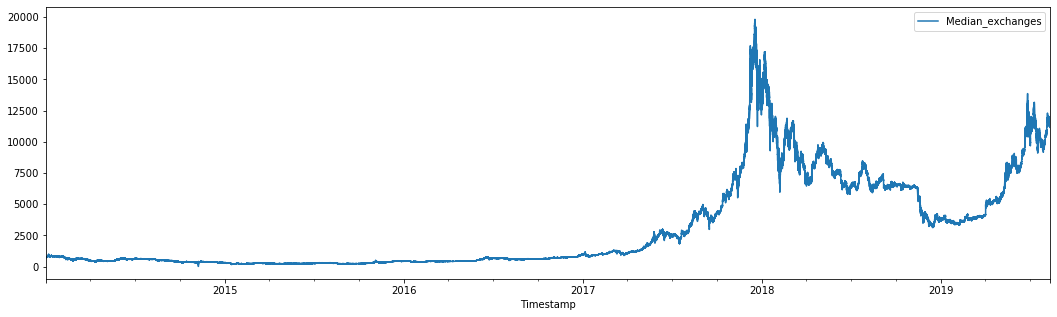

In [11]:
df.plot(x="Timestamp",y=["Median_exchanges"],figsize=(18,5))

In [12]:
df.to_pickle("/home/filip/Desktop/Ruđer/FinalData/general.pkl")

In [21]:
# Kreiranje drugog dataseta koji sadrži podatke od coinbasea
df = pd.read_pickle("/home/filip/Desktop/Ruđer/FinalData/general.pkl")
coinbase = pd.read_csv('/home/filip/Desktop/Ruđer/MinuteData/'+"coinbase"+'USD.csv_1-min_data.csv')
coinbase["Volume"] = coinbase["Volume"].fillna(0)
coinbase["Std"] = coinbase["Std"].fillna(0)
coinbase["Timestamp"] = coinbase["Timestamp"].astype('M8[s]')

In [22]:
df = pd.merge(df, coinbase, left_on='Timestamp', right_on='Timestamp', how='left')
df = df.loc[(df["Timestamp"]>"2015-02-03")&(df["Timestamp"]<"2019-01-01")]
df.head()

,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp,High_trades,Low_trades,Trades_trades,Std_trades,...,Var_trades,High,Low,Trades,Std,Price,Open,Close,Volume,Volume_mean
573060,238.3303,2.3424,239.4723,242.1667,237.9200,2015-02-03 00:01:00,242.3000,236.8800,37.0000,1.1152,...,1.2436,nan,nan,nan,nan,nan,nan,nan,nan,nan
573061,238.0017,1.8080,238.4550,241.9000,237.0050,2015-02-03 00:02:00,241.9000,237.0000,67.0000,0.6051,...,0.3662,237.0100,237.0000,2.0000,0.0071,237.0050,237.0100,237.0000,0.5190,0.2595
573062,237.6823,2.3535,238.6082,242.1000,236.9680,2015-02-03 00:03:00,242.1000,236.8500,55.0000,0.7093,...,0.5031,236.9900,236.9400,5.0000,0.0179,236.9680,236.9400,236.9700,8.3980,1.6796
573063,237.8340,1.6298,238.1360,241.8400,236.6100,2015-02-03 00:04:00,241.9000,236.6100,52.0000,1.3251,...,1.7560,236.9700,236.9700,4.0000,0.0000,236.9700,236.9700,236.9700,4.3510,1.0877
573064,237.1760,2.0360,238.1108,241.7000,236.9100,2015-02-03 00:05:00,241.7000,236.5100,31.0000,0.8693,...,0.7557,236.9400,236.9000,5.0000,0.0173,236.9100,236.9100,236.9400,3.7130,0.7426


In [23]:
print("Before:")
print(df.isnull().sum())
df = df.apply(pd.Series.interpolate)
print("\nAfter:")
print(df.isnull().sum())
print(df.shape)
df = df.dropna()
df.head()

Before:
Median_exchanges        0
Std_exchanges           0
Price_exchanges         0
High_exchanges          0
Low_exchanges           0
Timestamp               0
High_trades             0
Low_trades              0
Trades_trades           0
Std_trades              0
Price_trades            0
Var_trades              0
High                84326
Low                 84326
Trades              84326
Std                 84326
Price               84326
Open                84326
Close               84326
Volume              84326
Volume_mean         84326
dtype: int64

After:
Median_exchanges    0
Std_exchanges       0
Price_exchanges     0
High_exchanges      0
Low_exchanges       0
Timestamp           0
High_trades         0
Low_trades          0
Trades_trades       0
Std_trades          0
Price_trades        0
Var_trades          0
High                1
Low                 1
Trades              1
Std                 1
Price               1
Open                1
Close               1
Volume 

,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp,High_trades,Low_trades,Trades_trades,Std_trades,...,Var_trades,High,Low,Trades,Std,Price,Open,Close,Volume,Volume_mean
573061,238.0017,1.8080,238.4550,241.9000,237.0050,2015-02-03 00:02:00,241.9000,237.0000,67.0000,0.6051,...,0.3662,237.0100,237.0000,2.0000,0.0071,237.0050,237.0100,237.0000,0.5190,0.2595
573062,237.6823,2.3535,238.6082,242.1000,236.9680,2015-02-03 00:03:00,242.1000,236.8500,55.0000,0.7093,...,0.5031,236.9900,236.9400,5.0000,0.0179,236.9680,236.9400,236.9700,8.3980,1.6796
573063,237.8340,1.6298,238.1360,241.8400,236.6100,2015-02-03 00:04:00,241.9000,236.6100,52.0000,1.3251,...,1.7560,236.9700,236.9700,4.0000,0.0000,236.9700,236.9700,236.9700,4.3510,1.0877
573064,237.1760,2.0360,238.1108,241.7000,236.9100,2015-02-03 00:05:00,241.7000,236.5100,31.0000,0.8693,...,0.7557,236.9400,236.9000,5.0000,0.0173,236.9100,236.9100,236.9400,3.7130,0.7426
573065,238.1523,1.5428,238.5050,241.7333,236.9133,2015-02-03 00:06:00,241.8000,236.9000,47.0000,0.9963,...,0.9926,236.9400,236.9000,3.0000,0.0231,236.9133,236.9000,236.9400,12.0000,4.0000


In [16]:
df.to_pickle("/home/filip/Desktop/Ruđer/FinalData/distinct.pkl")

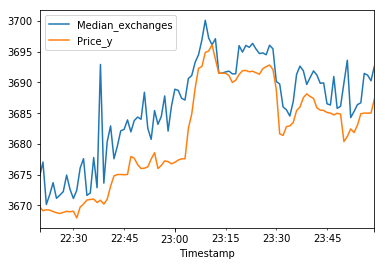

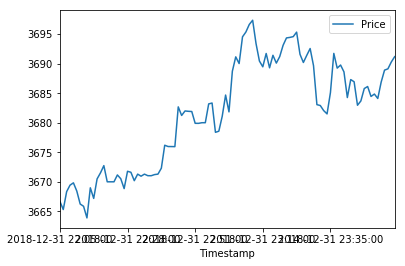

In [20]:
df.tail(100).plot(x="Timestamp",y=["Median_exchanges","Price_x","Price_y"])
bitstamp.tail(100).plot(x="Timestamp",y=["Price"])

In [26]:
bitstamp = pd.read_csv('/home/filip/Desktop/Ruđer/MinuteData/'+"bitstamp"+'USD.csv_1-min_data.csv')
bitstamp["Timestamp"] = bitstamp["Timestamp"].astype('M8[s]')
bitstamp.head()

,High,Low,Trades,Std,Price,Open,Close,Volume,Volume_mean,Timestamp
0,nan,nan,nan,nan,nan,nan,nan,nan,nan,NaT
1,739.0000,739.0000,1.0000,nan,739.0000,739.0000,739.0000,0.3800,0.3800,2014-01-01 01:02:00
2,739.0000,738.1100,3.0000,0.5138,738.4067,739.0000,738.1100,0.9040,0.3013,2014-01-01 01:04:00
3,738.5000,738.5000,1.0000,nan,738.5000,738.5000,738.5000,0.1000,0.1000,2014-01-01 01:05:00
4,739.0000,739.0000,1.0000,nan,739.0000,739.0000,739.0000,0.0803,0.0803,2014-01-01 01:06:00


In [27]:
df = pd.merge(df, bitstamp, left_on='Timestamp', right_on='Timestamp', how='left')
df.head()

,Median_exchanges,Std_exchanges,Price_exchanges,High_exchanges,Low_exchanges,Timestamp,High_trades,Low_trades,Trades_trades,Std_trades,...,Volume_mean_x,High_y,Low_y,Trades_y,Std_y,Price_y,Open_y,Close_y,Volume_y,Volume_mean_y
0,238.0017,1.8080,238.4550,241.9000,237.0050,2015-02-03 00:02:00,241.9000,237.0000,67.0000,0.6051,...,0.2595,238.1200,238.0300,3.0000,0.0458,238.0700,238.1200,238.0300,4.9500,1.6500
1,237.6823,2.3535,238.6082,242.1000,236.9680,2015-02-03 00:03:00,242.1000,236.8500,55.0000,0.7093,...,1.6796,237.9700,236.8500,16.0000,0.4796,237.5838,237.9700,237.9000,22.1816,1.3863
2,237.8340,1.6298,238.1360,241.8400,236.6100,2015-02-03 00:04:00,241.9000,236.6100,52.0000,1.3251,...,1.0877,237.9200,236.8500,11.0000,0.4827,237.3773,236.8700,237.6400,13.5907,1.2355
3,237.1760,2.0360,238.1108,241.7000,236.9100,2015-02-03 00:05:00,241.7000,236.5100,31.0000,0.8693,...,0.7426,237.5900,236.5100,5.0000,0.4795,237.1760,236.5100,237.3400,5.2794,1.0559
4,238.1523,1.5428,238.5050,241.7333,236.9133,2015-02-03 00:06:00,241.8000,236.9000,47.0000,0.9963,...,4.0000,237.5200,237.4800,3.0000,0.0231,237.5067,237.5200,237.4800,3.8559,1.2853


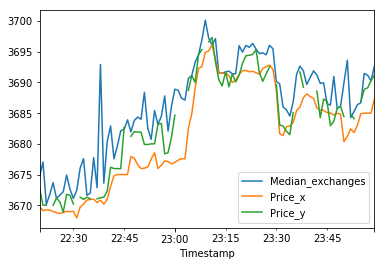

In [28]:
df.tail(100).plot(x="Timestamp",y=["Median_exchanges","Price_x","Price_y"])